Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5  

C:\Users\jigya\AppData\Local\Temp\ipykernel_812\9010045.py:37: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(customers_df.describe(include='all'))
C:\Users\jigya\AppData\Local\Temp\ipykernel_812\9010045.py:39: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(transactions_df.describe(include='all'))


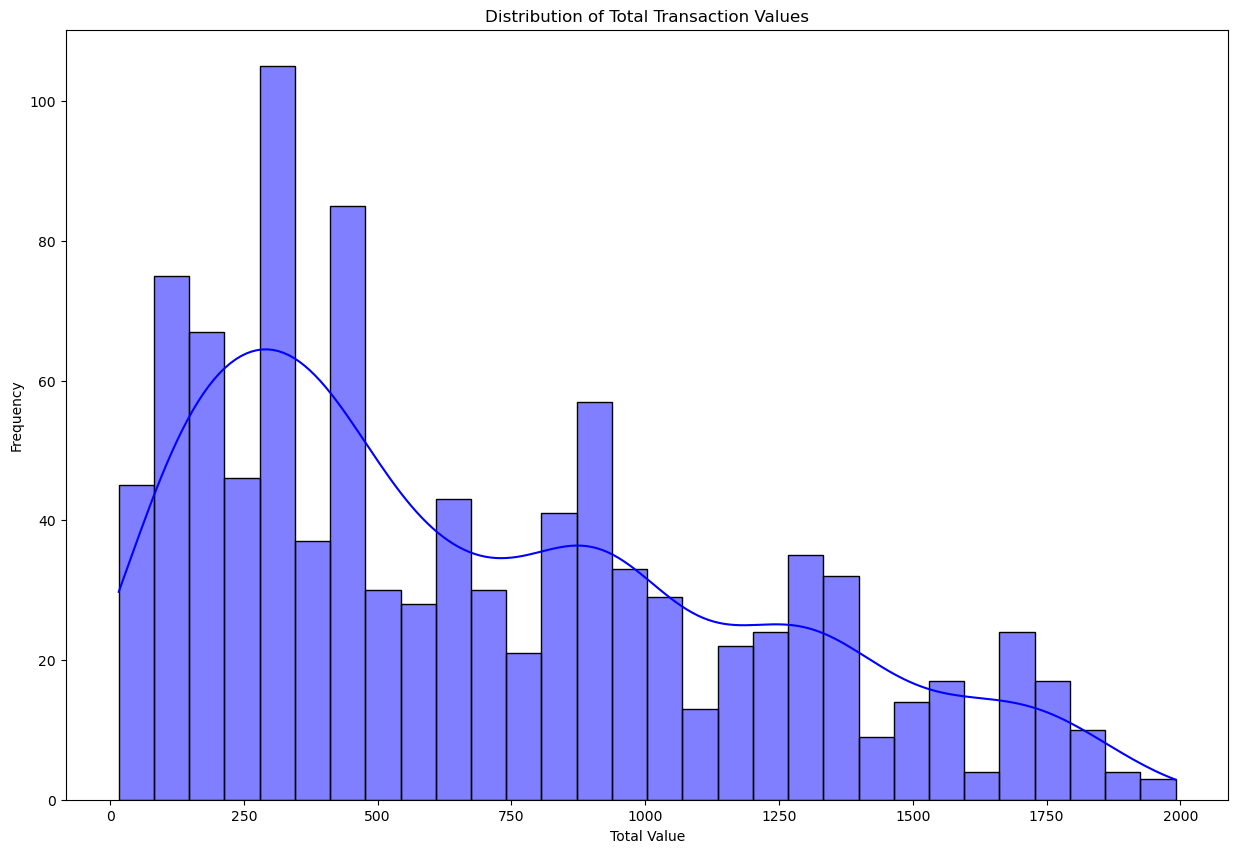

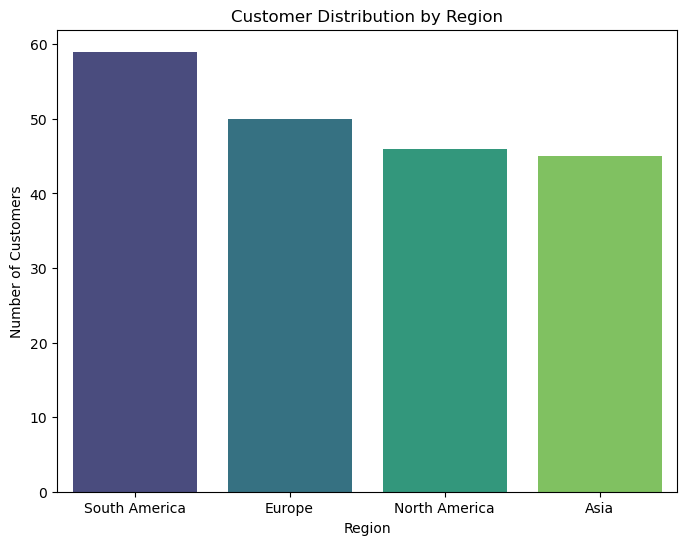

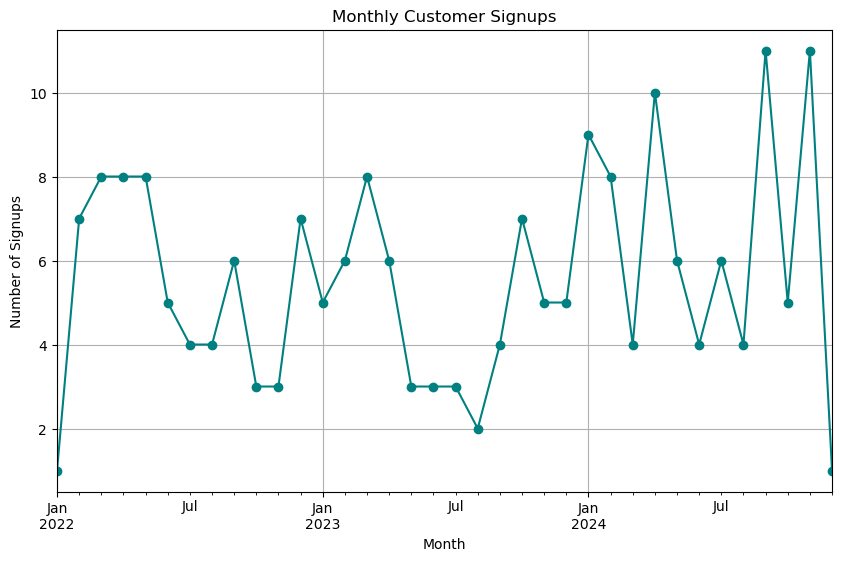

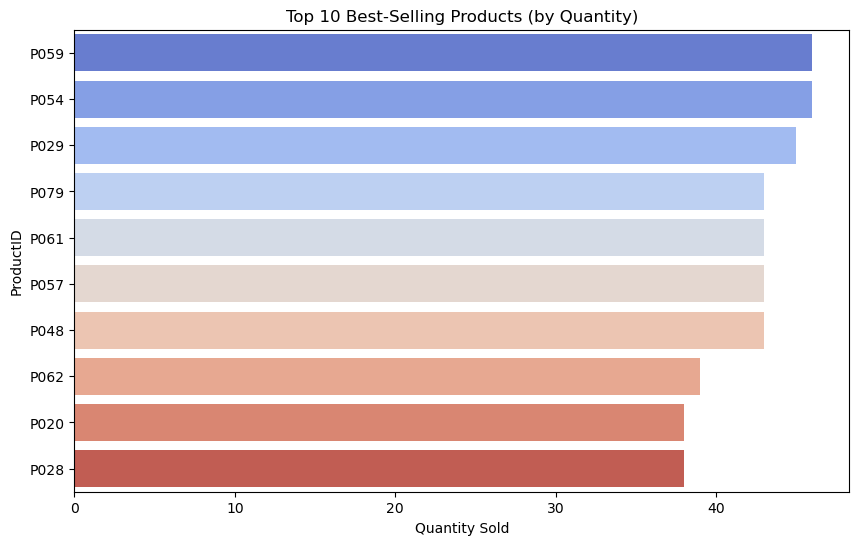

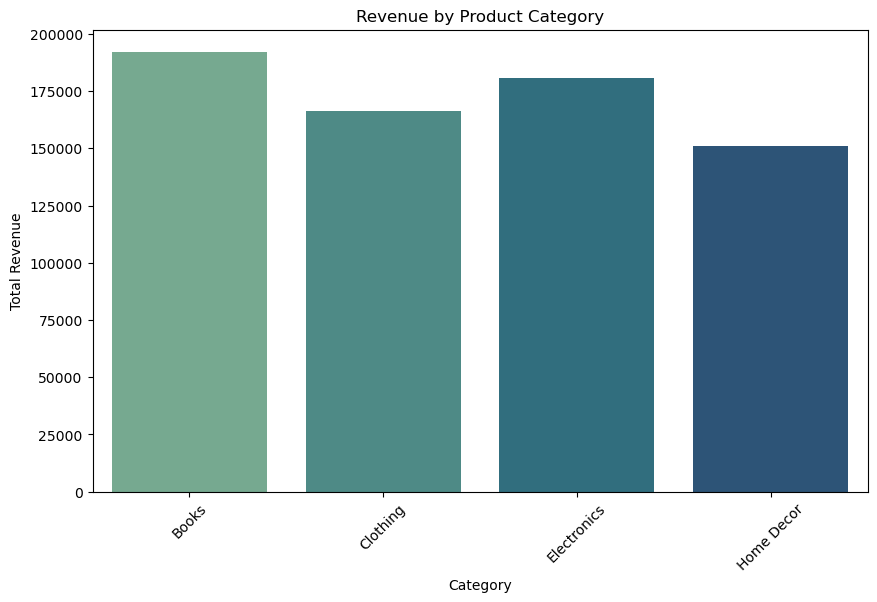

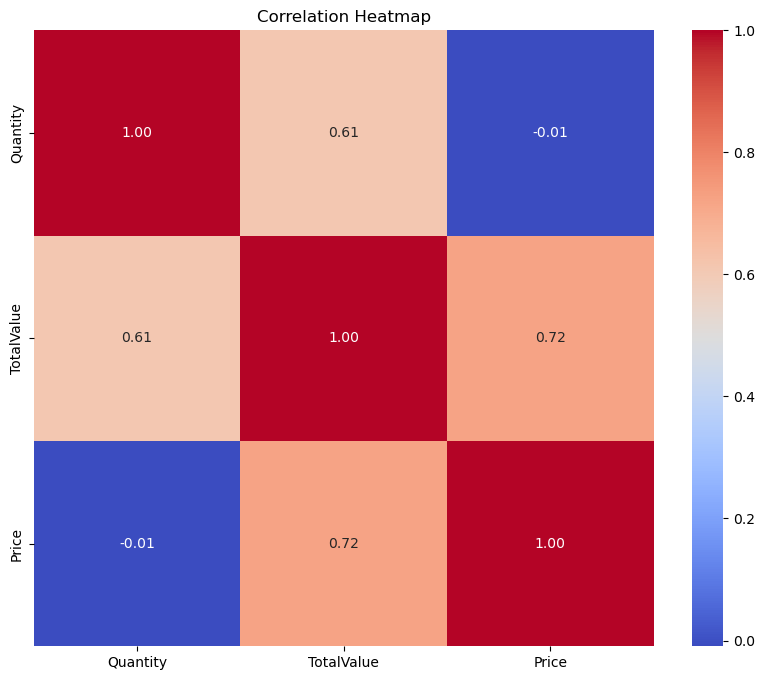


Region Distribution:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

Monthly Customer Signups:
SignupDate
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, dtype: int64

Top-Selling Products by Quantity:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64

Revenue by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64

Top 10 Customers by Total Transaction Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


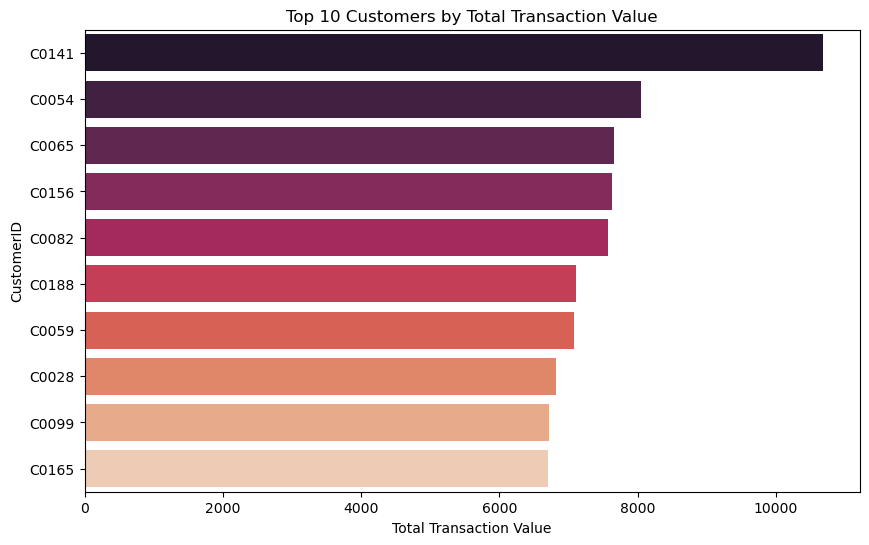

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
customers_file = 'Customers.csv'
transactions_file = 'Transactions.csv'
products_file = 'Products.csv'

# Load datasets
customers_df = pd.read_csv(customers_file)
transactions_df = pd.read_csv(transactions_file)
products_df = pd.read_csv(products_file)

# Convert date columns to datetime for easier manipulation
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Display basic information about datasets
print("Customers Dataset Info:")
print(customers_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())
print("\nProducts Dataset Info:")
print(products_df.info())

# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())

# Summary statistics
print("\nCustomers Dataset Summary:")
print(customers_df.describe(include='all'))
print("\nTransactions Dataset Summary:")
print(transactions_df.describe(include='all'))
print("\nProducts Dataset Summary:")
print(products_df.describe(include='all'))

# Distribution of numerical columns
plt.figure(figsize=(15, 10))
sns.histplot(transactions_df['TotalValue'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

# Customer distribution by region
region_distribution = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.show()

# Monthly customer signups
customer_signups = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
customer_signups.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Customer Signups')
plt.ylabel('Number of Signups')
plt.xlabel('Month')
plt.grid()
plt.show()

# Top-selling products by quantity
top_products_by_quantity = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_by_quantity.values, y=top_products_by_quantity.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products (by Quantity)')
plt.xlabel('Quantity Sold')
plt.ylabel('ProductID')
plt.show()

# Revenue by product category
merged_df = transactions_df.merge(products_df, on='ProductID')
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='crest')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
numeric_cols = transactions_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(transactions_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Business Insights
print("\nRegion Distribution:")
print(region_distribution)
print("\nMonthly Customer Signups:")
print(customer_signups.tail())
print("\nTop-Selling Products by Quantity:")
print(top_products_by_quantity)
print("\nRevenue by Product Category:")
print(revenue_by_category)

# To Identify top customers by transaction value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Transaction Value:")
print(top_customers)

# To Visualize top customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='rocket')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('CustomerID')
plt.show()
